In [1]:
import json
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt
import wandb
import time
from tqdm import tqdm

In [2]:
dataset = "test"
with open(f"./piedata(1008)/pie/annotations/instancesPie(1008)_{dataset}2019.json", "r") as f:
    test_json = json.load(f)
test_json.keys()

dict_keys(['licenses', 'images', 'annotations', 'categories'])

In [3]:
df_images = pd.DataFrame(test_json["images"])
df_images

,file_name,height,width,id
0,f447ffede2ef85e73a191f8c1ed3f9df_c3RhdGxpbmtzL...,273,331,73075
1,f447ffede2ef85e73a191f8c1ed3f9df_c3RhdGxpbmtzL...,273,303,73076
2,f449d055d0020a85e6991e21e4b8e2df_d3d3LnphcG9wY...,331,535,73077
3,f449d8f2044f441270110f1a3774ff04_d3d3LnNoaXJ1c...,376,737,73078
4,f44a875dc618aacc6fc8a09105a2b163_bWFpbC50ZGItZ...,342,347,73079
...,...,...,...,...
1918,fa217bc24c389402bcf886ded5d70397_d3d3Lmdlb2Zvc...,298,422,74993
1919,fa233aef2226467e2fabf9429aee5a95_cHVibGljYXRpb...,487,721,74994
1920,fa248decd453a9e65811e570c9abd4cf_d3d3Lmdsb2Jhb...,341,577,74995
1921,fa248decd453a9e65811e570c9abd4cf_d3d3Lmdsb2Jhb...,341,577,74996


In [4]:
print(df_images[df_images["file_name"]=="f8b2e1fe0eb9f5262522c2ebf0ec1dff_d3d3LnN0b3Jlcy50cmFja3BoYW50b20uY29tCTEwOC4xNjcuMTM1Ljc2.xls-0-0.png"])

                                              file_name  height  width     id
1426  f8b2e1fe0eb9f5262522c2ebf0ec1dff_d3d3LnN0b3Jlc...     115    220  74501


In [6]:
df_anno = pd.DataFrame(test_json['annotations'])
df_anno

,image_id,category_id,bbox,area,id
0,73075,0,"[191.0, 32.0, 285.0, 184.0, 191.0, 137.0]",11225.039932,422950
1,73075,0,"[285.0, 184.0, 223.0, 237.0, 191.0, 137.0]",4399.705457,422951
2,73075,0,"[223.0, 237.0, 172.0, 240.0, 191.0, 137.0]",2705.904134,422952
3,73075,0,"[172.0, 240.0, 135.0, 226.0, 191.0, 137.0]",2088.187248,422953
4,73075,0,"[135.0, 226.0, 109.0, 203.0, 191.0, 137.0]",1834.405884,422954
...,...,...,...,...,...
10917,74995,0,"[193.0, 80.0, 245.0, 68.0, 245.0, 189.0]",3252.344669,433867
10918,74996,0,"[253.0, 68.0, 158.0, 264.0, 252.0, 189.0]",16388.330808,433868
10919,74996,0,"[158.0, 264.0, 253.0, 68.0, 252.0, 189.0]",16388.330808,433869
10920,74997,0,"[264.0, 68.0, 382.0, 216.0, 264.0, 189.0]",13151.083208,433870


True
2


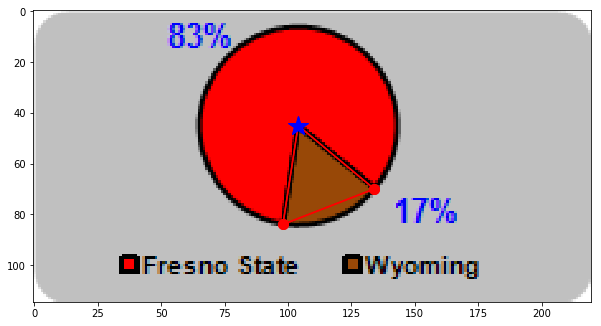

In [8]:
idx = 1426
image_root = f"./piedata(1008)/pie/images/{dataset}2019/"
image_path = image_root + df_images.iloc[idx]["file_name"]
print("f8b2e1fe0eb9f5262522c2ebf0ec1dff_d3d3LnN0b3Jlcy50cmFja3BoYW50b20uY29tCTEwOC4xNjcuMTM1Ljc2.xls-0-0.png"==df_images.iloc[idx]["file_name"])
PIL_image = PIL.Image.open(image_path)

image_id = df_images.iloc[idx]["id"]
annotations = df_anno[df_anno["image_id"] == image_id]

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(PIL_image)
print(len(annotations))
center_point, single_center = None, True
for key_points_idx in range(len(annotations)):
    key_points = annotations["bbox"].iloc[key_points_idx]
    x1,y1, x2,y2, x3,y3 = key_points
    if center_point is None:
        center_point = (x3, y3)
    else:
        if center_point != (x3, y3):
            single_center = False
    
    # line
    ax.plot([x1,x2],[y1,y2],'-r')
    ax.plot([x2,x3],[y2,y3],'-r')
    ax.plot([x3,x1],[y3,y1],'-r')
    
    # scatter
    ax.plot(x1,y1,'or',markersize=10)
    ax.plot(x2,y2,'or',markersize=10)
    
    # center_point
    ax.plot(x3,y3,'*b',markersize=20)

plt.show()

In [ ]:
print("done")